In [35]:
import tensorflow as tf
import numpy as np
import pandas as pd
import requests
import os
import io
from PIL import Image
import cv2
from matplotlib import pyplot as plt

In [16]:
test_path = "./Downloaded_Images/"

In [5]:
model = tf.keras.models.load_model("./model.h5")

In [14]:
##### Append your urls of animals here for prediction #####
img_url = ['https://pbs.twimg.com/profile_images/378800000532546226/dbe5f0727b69487016ffd67a6689e75a.jpeg',
           'https://i.ytimg.com/vi/UwtTSqTbWzg/maxresdefault.jpg',
           'https://images.unsplash.com/photo-1547399300-7613d8f5f8f1?ixlib=rb-1.2.1&w=1000&q=80',
           'https://www.theartofdoingstuff.com/wp-content/uploads/2014/06/Studio_BlkCpMrnHn_8771_L2.jpg',
           'https://www.k9rl.com/wp-content/uploads/2017/01/Tibetan-Spaniel-dog.jpg',
           'https://static.boredpanda.com/blog/wp-content/uploads/2016/06/I-found-freedom-with-horses-576d2d0804976__880.jpg',
           'https://th.bing.com/th/id/OIP.tOb0fbG7VgjMf2Mj7Sa9igHaEK?pid=Api&rs=1',
           'https://pixfeeds.com/images/topic/2779/1200-2779-butterflies-photo1.jpg',
           'https://th.bing.com/th/id/OIP.GmYkDxsD--csxHFes-lWFwHaDS?pid=Api&rs=1',
           'https://resize.hswstatic.com/w_1024/gif/banana-spider.jpg',
           'https://www.nationalgeographic.com/content/dam/animals/2018/10/waq-animal-caches/01-waq-animal-caches-nationalgeographic_1902487.ngsversion.1539338405615.adapt.1900.1.jpg',
           'https://upload.wikimedia.org/wikipedia/commons/a/ac/Bombay_femelle.JPG',
           'https://th.bing.com/th/id/OIP.1L_D_VUm0lIxk_g1-5uxrgHaEi?pid=Api&rs=1',
           'https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/7_month_old_Suffolk_Ram_Lamb.JPG/1200px-7_month_old_Suffolk_Ram_Lamb.JPG',
           'https://www.guidedogs.org/wp-content/uploads/2019/11/website-donate-mobile.jpg',
           'https://kids.sandiegozoo.org/sites/default/files/2017-09/animal-hero-spiders.jpg',
           'https://media4.s-nbcnews.com/j/newscms/2014_11/241886/140310-smart-elephants-347_5f910b48b8c1a85fc892e9c3d9cc2d00.fit-760w.jpg',
           'https://rollingharbourlife.files.wordpress.com/2013/05/squirrel-nyc-3.jpg',
           'https://media.mnn.com/assets/images/2015/04/butterfly.jpg.990x0_q80_crop-smart.jpg',
           'https://i.imgur.com/drfirIW.jpg'
          ]
! mkdir Downloaded_Images
for i in range(len(img_url)):
    try :
        response = requests.get(img_url[i])
        image_bytes = io.BytesIO(response.content)
        img = PIL.Image.open(image_bytes)
        # img.show()
        img.save("./Downloaded_Images/image" + str(i) + ".png")
    except:
        continue

In [44]:
classes = ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']

In [51]:
def get_output(img):
#     img1 = tf.keras.preprocessing.image.load_img(img, target_size=(224, 224), interpolation='nearest')
#     test_img = tf.keras.preprocessing.image.img_to_array(img1, data_format="channels_last")/255
#     test_img = np.expand_dims(test_img, axis=0)
    img1 = cv2.imread(img)
    temp = Image.fromarray(img1, 'RGB')
    temp = temp.resize((224, 224))
    test_img = np.array(temp) / 255
    test_img = np.expand_dims(test_img, axis=0)
    scores = model.predict(test_img)
    prob = np.max(scores, axis = 1)
    preds = np.argmax(scores, axis = 1)
#     print(f"{prob[0] * 100}% probability of {classes[preds[0]]}")
    return f"{classes[preds[0]]} -- {prob[0] * 100} %"

In [52]:
import matplotlib.image as mpimg

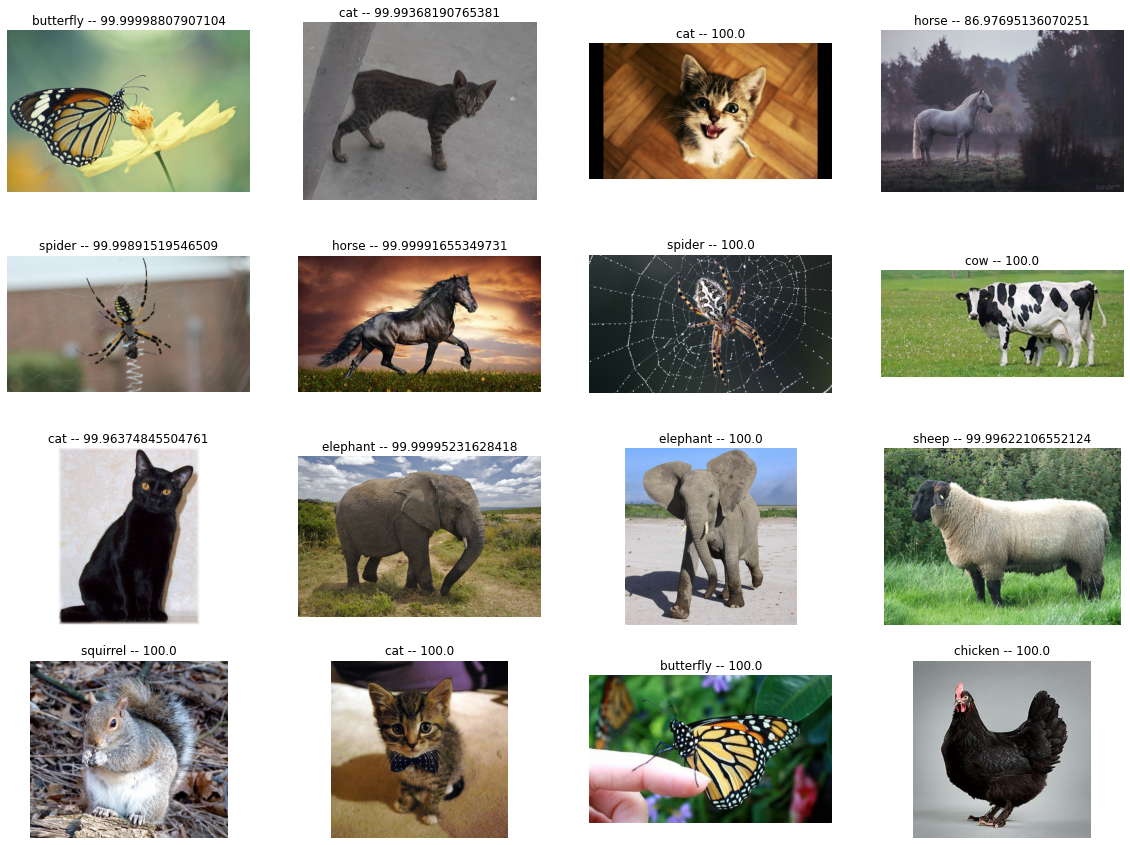

In [58]:
images = [file for file in os.listdir(test_path)]
ind = 0
plt.figure(figsize=(20, 15))
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.axis("off")
    if ind > len(images):
        break
    img = mpimg.imread(test_path + images[ind])
    plt.imshow(img)
    plt.title(get_output(test_path + images[ind]))
    ind += 1